In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_style("whitegrid")


In [2]:
def plot_distribution(
        data: pd.DataFrame,
        variable: str,
        fig_size: tuple[int, int] = (12, 4),
        kde: bool = False,
        bins: int | None = None
) -> None:
    """
    Visualizes the distribution of a numerical variable using a histogram and a boxplot.

    This function creates a combined plot with a boxplot (top) and a histogram (bottom)
    to provide insights into the variable's distribution, central tendency, and spread.

    Parameters
    ----------
    data : pd.DataFrame
        The DataFrame containing the data.
    variable : str
        Column name of the numerical variable to be plotted.
    fig_size : tuple[int, int], optional
        Size of the figure, by default (12, 4).
    kde : bool, optional
        Whether to overlay a density curve on the histogram, by default False.
    bins : int or None, optional
        Number of bins for the histogram, by default None (automatic bin size).

    Returns
    -------
    None
        The function displays the plot but does not return any values.
    """

    # Set up the matplotlib figure with two rows and one column
    fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=fig_size, sharex=True, gridspec_kw={"height_ratios": [0.2, 0.8]})

    # Plot the boxplot on the first row
    sns.boxplot(x=variable, data=data, ax=ax1, showmeans=True, color="lightblue")
    ax1.set(xlabel="", title=f"Distribution Analysis of {variable}: Boxplot & Histogram")

    # Plot the histogram on the second row
    if bins is not None:
        sns.histplot(data=data, x=variable, kde=kde, bins=bins, ax=ax2, color="lightblue")
    else:
        sns.histplot(data=data, x=variable, kde=kde, ax=ax2, color="lightblue")

    # Draw lines for mean and median
    mean, median = data[variable].mean(), data[variable].median()
    ax2.axvline(mean, color="green", linestyle="--", linewidth=2, label=f"Mean: {mean:.2f}")
    ax2.axvline(median, color="black", linestyle="-", linewidth=2, label=f"Median: {median:.2f}")

    # Add legend to the histogram
    ax2.legend()

    plt.show()

In [3]:
# Read dataset
scada_df = pd.read_parquet("../data/SCADA_Cleaned.parquet")


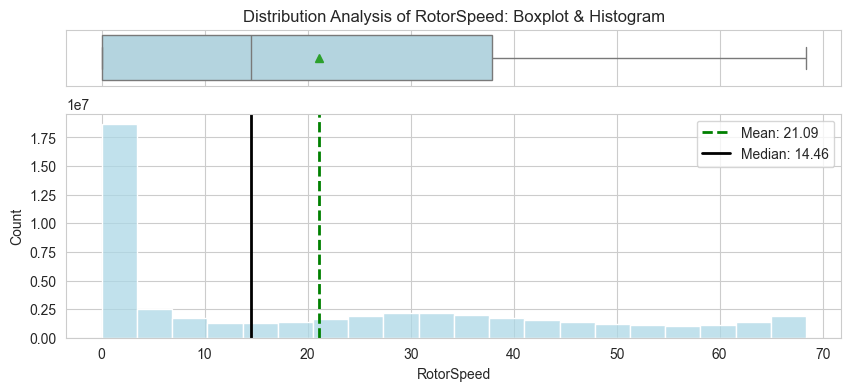

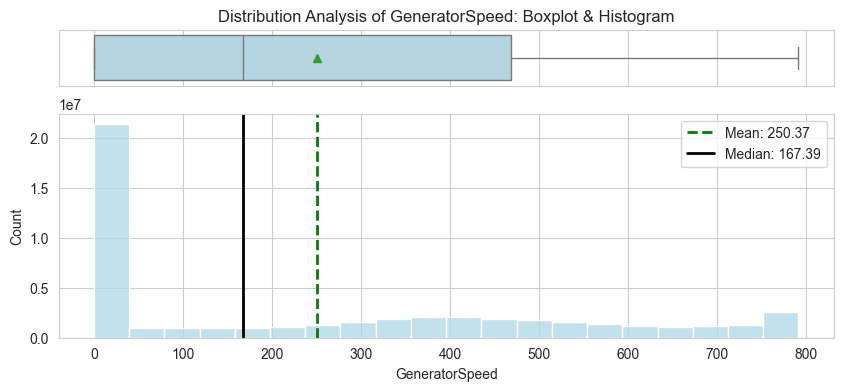

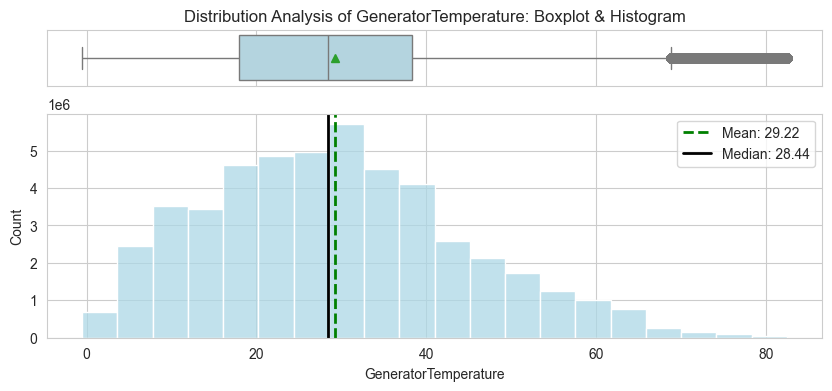

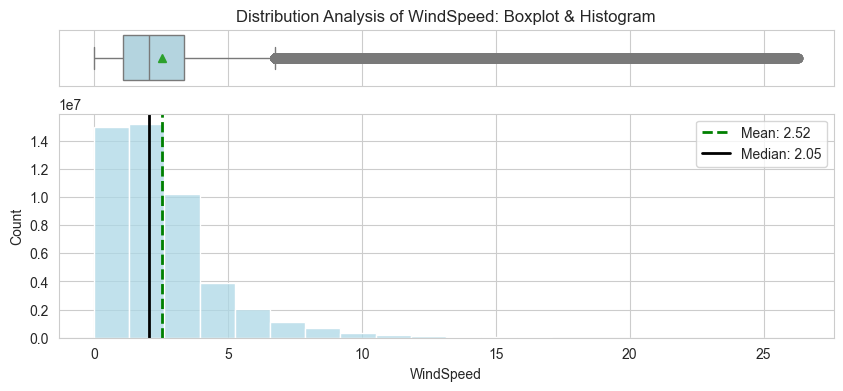

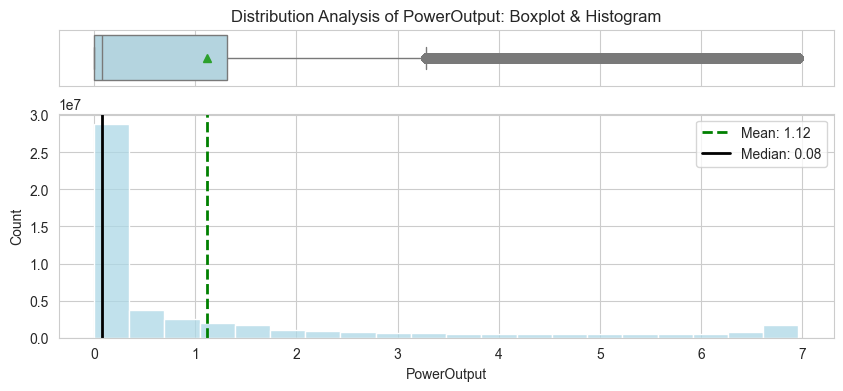

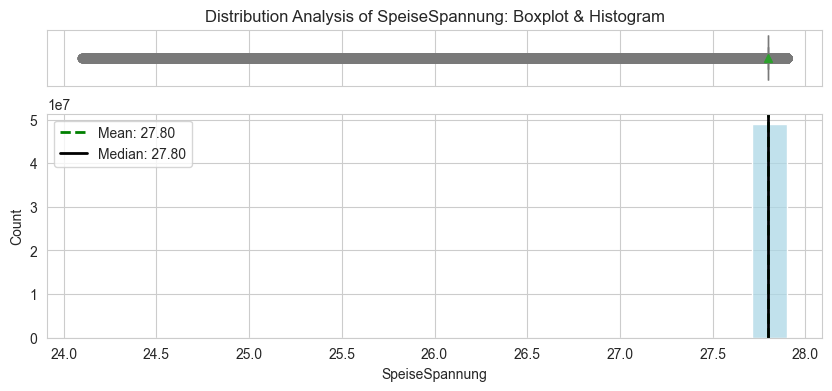

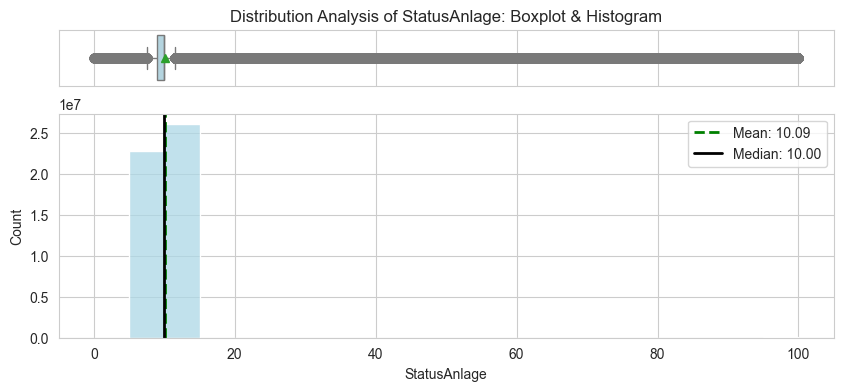

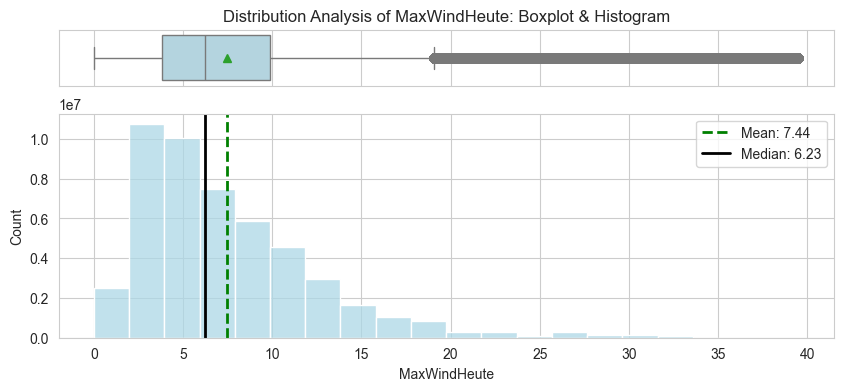

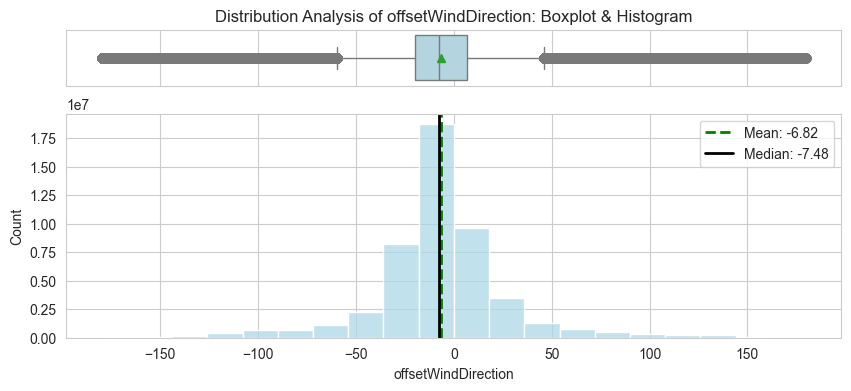

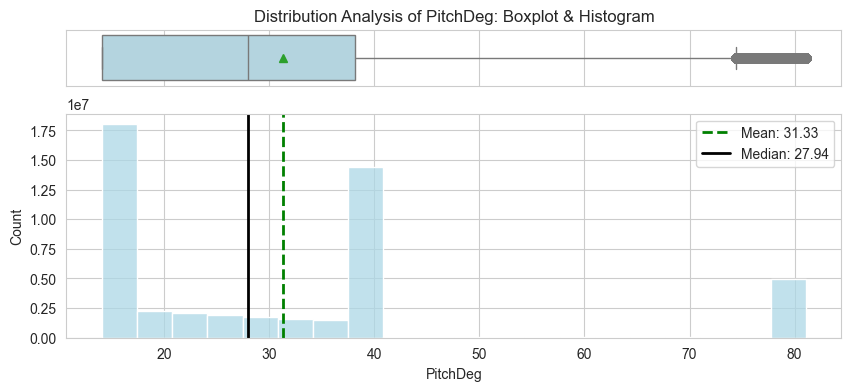

In [4]:
# Loop through columns, visualize distribution
for column in scada_df.columns:
    plot_distribution(data=scada_df, variable=column, fig_size=(10, 4), kde=False, bins=20)

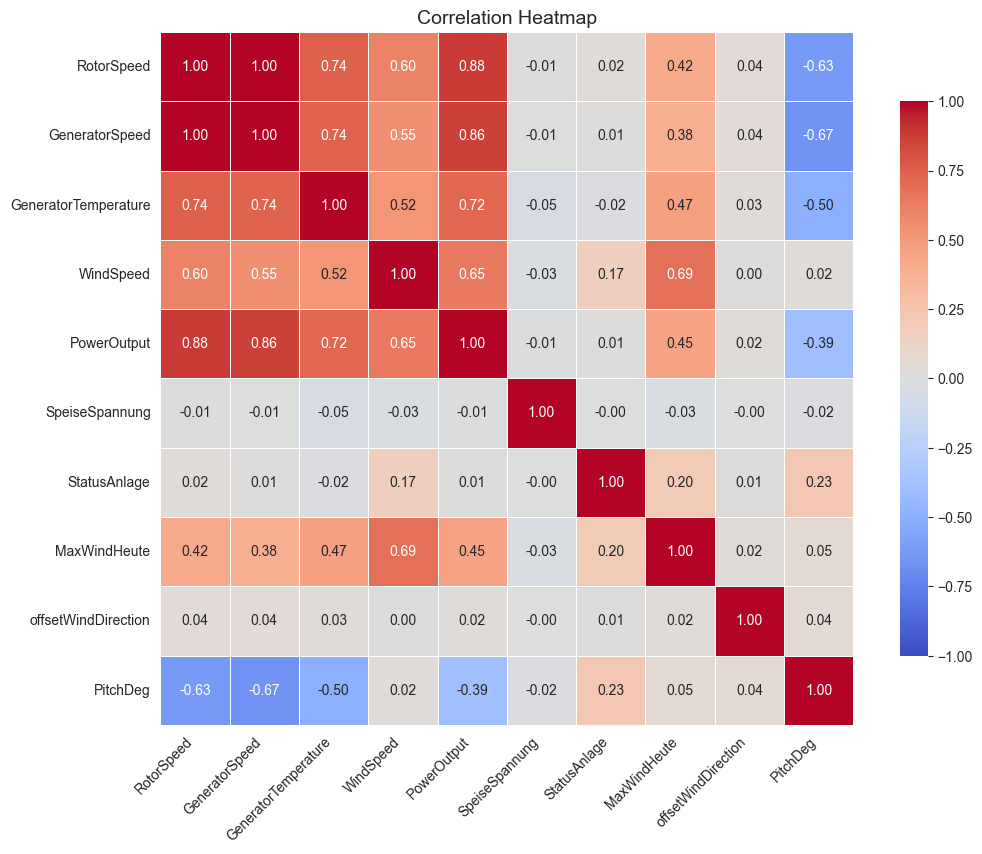

In [5]:
# Heatmap of correlation coefficients
corr = scada_df.corr()

plt.figure(figsize=(12, 9))
sns.heatmap(
    data=corr,
    annot=True,
    fmt=".2f",
    vmin=-1,
    vmax=1,
    cmap="coolwarm",
    linewidths=0.5,
    cbar_kws={"shrink": 0.8},
    square=True,
)
plt.title("Correlation Heatmap", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.show()